# Bengaluru Real Estate Price Prediction Model

In [1]:
import pandas as pd
import numpy as np

### Data Gathering

- ##### Dataset Link: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [2]:
df = pd.read_csv('db/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Data Cleaning

In [5]:
df.drop(['area_type', 'availability', 'society'], axis = 1, inplace = True)

In [6]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df['balcony'].describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [9]:
import math

In [10]:
df['balcony'].fillna(math.floor(df['balcony'].mean()), inplace = True)

In [11]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [12]:
df.dropna(axis = 0, inplace = True)

In [13]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
def convert_size(size):
    return int(size.split(' ')[0])

In [16]:
df['size(BHK)'] = df['size'].apply(convert_size)

In [17]:
df.drop(['size'], axis = 1, inplace = True)

In [18]:
df.head()

,location,total_sqft,bath,balcony,price,size(BHK)
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [19]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_num(sqft):
    try:
        float(sqft)
    except:
        return False
    return True

In [21]:
df[~df['total_sqft'].apply(is_num)]

,location,total_sqft,bath,balcony,price,size(BHK)
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [22]:
def convert_sqft(sqft):
    try:
        return np.float_(sqft.split(' - ')).mean()
    except:
        return None

In [23]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

In [24]:
df['total_sqft'].isnull().sum()

46

In [25]:
df.dropna(axis = 0, inplace = True)

In [26]:
df.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
size(BHK)     0
dtype: int64

In [27]:
df.head()

,location,total_sqft,bath,balcony,price,size(BHK)
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [28]:
df.describe()

,total_sqft,bath,balcony,price,size(BHK)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,1555.302783,2.691136,1.562045,112.276178,2.800833
std,1237.323445,1.338915,0.808377,149.175995,1.292843
min,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1275.000000,2.000000,2.000000,71.850000,3.000000
75%,1672.000000,3.000000,2.000000,120.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,43.000000


In [29]:
df[df['total_sqft'] > 52000]

,location,total_sqft,bath,balcony,price,size(BHK)
1894,Nelamangala,52272.0,2.0,1.0,140.0,3


In [30]:
df[df['bath'] == 40]

,location,total_sqft,bath,balcony,price,size(BHK)
4684,Munnekollal,2400.0,40.0,0.0,660.0,43


In [31]:
df[df['price'] == 3600]

,location,total_sqft,bath,balcony,price,size(BHK)
13067,Defence Colony,7150.0,13.0,1.0,3600.0,10


In [32]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [33]:
df.head()

,location,total_sqft,bath,balcony,price,size(BHK),price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [34]:
df.location.describe()

count          13200
unique          1298
top       Whitefield
freq             532
Name: location, dtype: object

In [35]:
df['location'] = df['location'].apply(lambda x: x.strip())

In [36]:
df.location.describe()

count          13200
unique          1287
top       Whitefield
freq             533
Name: location, dtype: object

In [37]:
loaction_stats = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
loaction_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [38]:
len(loaction_stats[loaction_stats <= 10])

1047

In [39]:
other = loaction_stats[loaction_stats <= 10]
other

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [40]:
df['location'] = df['location'].apply(lambda x: 'other' if x in other else x)

In [41]:
df['location'].describe()

count     13200
unique      241
top       other
freq       2872
Name: location, dtype: object

In [42]:
df[df['total_sqft'] / df['size(BHK)'] < 300]

,location,total_sqft,bath,balcony,price,size(BHK),price_per_sqft
9,other,1020.0,6.0,1.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,1.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,1400.0,7.0,1.0,218.0,7,15571.428571
13279,other,1200.0,5.0,1.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [43]:
df = df[df['total_sqft'] / df['size(BHK)'] >= 300]
df.shape

(12456, 7)

In [44]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [45]:
df = remove_pps_outliers(df)
df.shape

(10242, 7)

In [46]:
df.head()

,location,total_sqft,bath,balcony,price,size(BHK),price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [47]:
import matplotlib.pyplot as plt
import matplotlib

In [48]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df['size(BHK)'] == 2)]
    bhk3 = df[(df.location == location) & (df['size(BHK)'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (10, 8)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

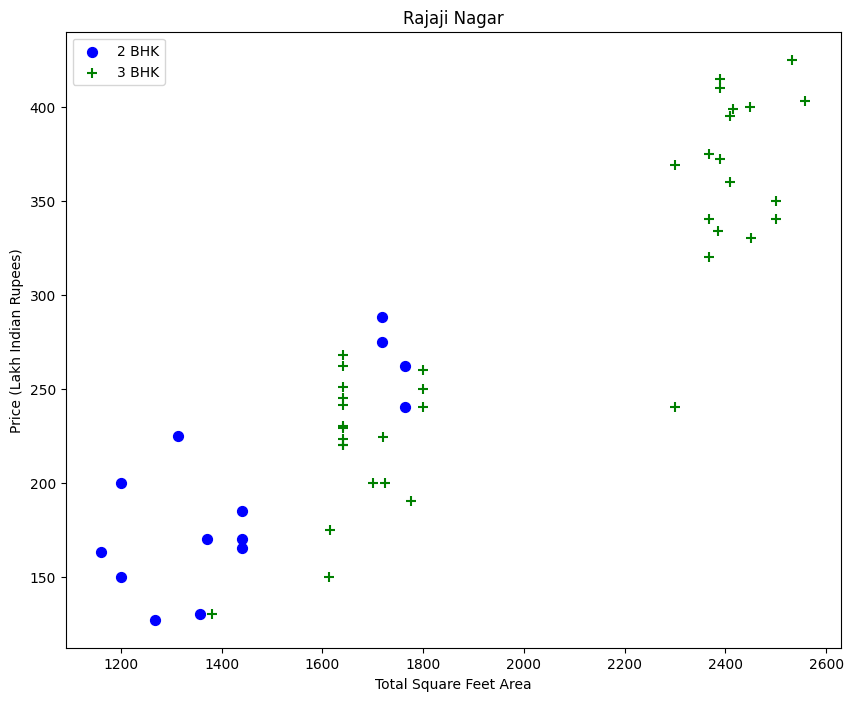

In [49]:
plot_scatter_chart(df, "Rajaji Nagar")

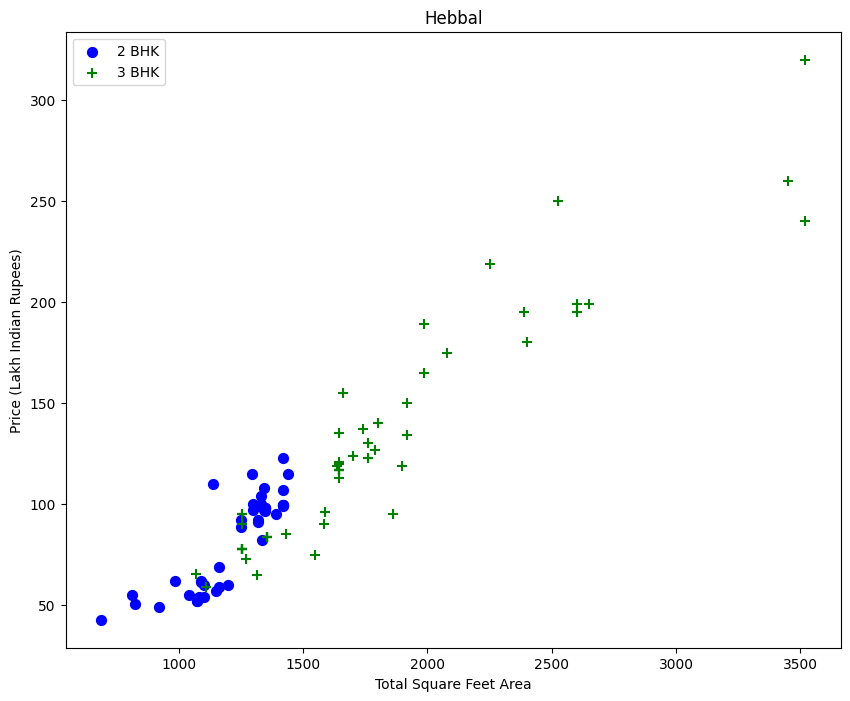

In [50]:
plot_scatter_chart(df, "Hebbal")

In [51]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size(BHK)'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size(BHK)'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

In [52]:
df = remove_bhk_outliers(df)
df.shape

(7317, 7)

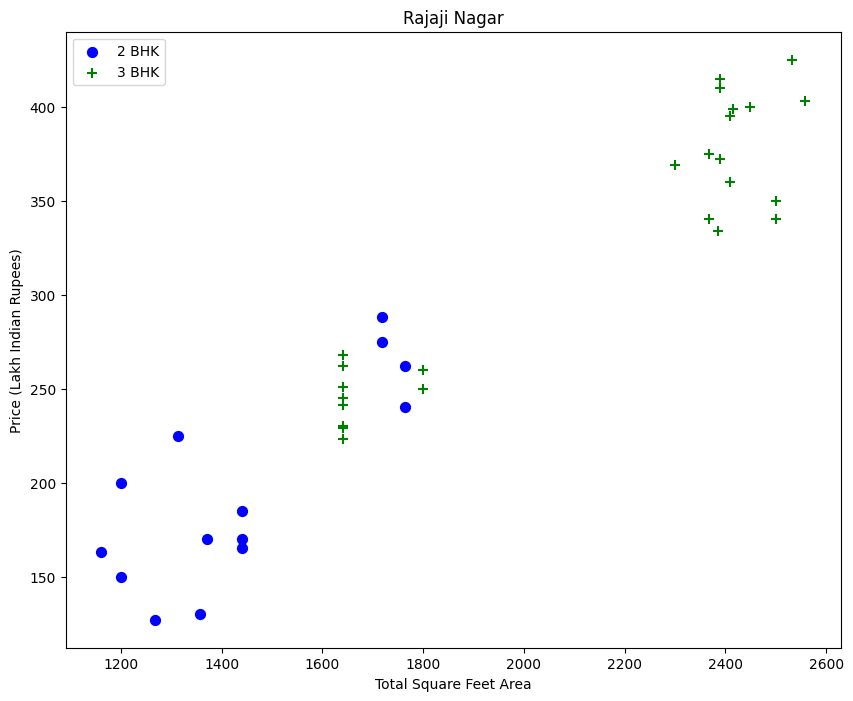

In [53]:
plot_scatter_chart(df, "Rajaji Nagar")

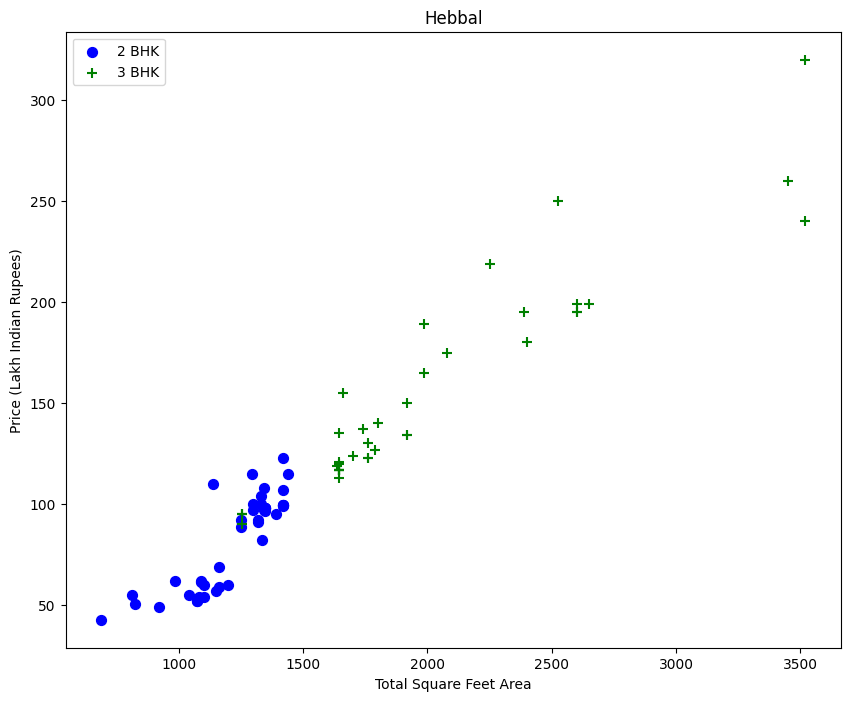

In [54]:
plot_scatter_chart(df, "Hebbal")

Text(0, 0.5, 'Count')

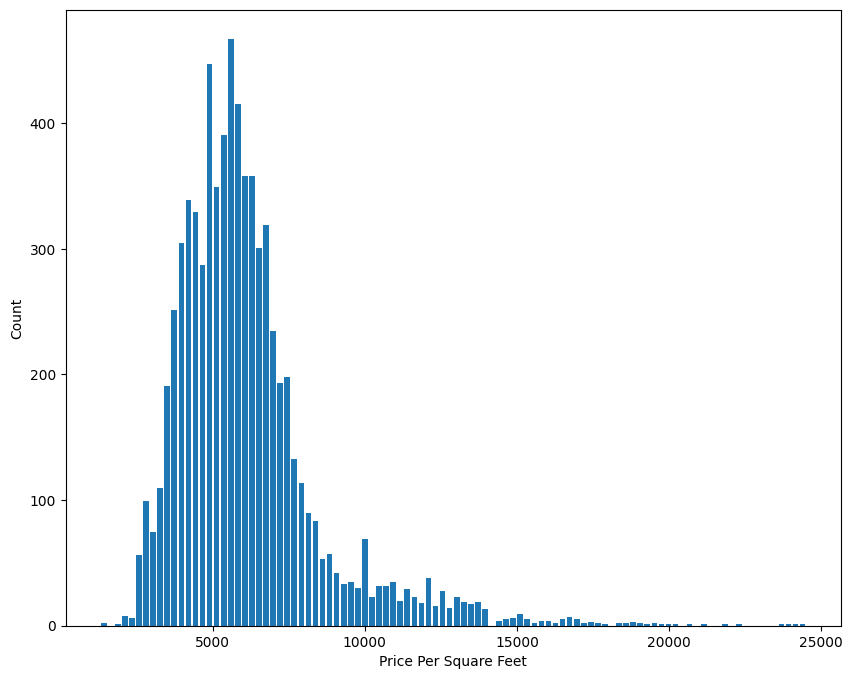

In [55]:
matplotlib.rcParams["figure.figsize"] = (10, 8)
plt.hist(df.price_per_sqft, rwidth = 0.8, bins = 100)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [56]:
df.price_per_sqft.skew()

1.9994097701696782

In [57]:
df.bath.value_counts()

bath
2.0     4188
3.0     1763
1.0      568
4.0      501
5.0      175
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
16.0       1
13.0       1
Name: count, dtype: int64

In [58]:
df[df.bath > 10]

,location,total_sqft,bath,balcony,price,size(BHK),price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,1.0,160.0,10,4000.000000
8483,other,12000.0,12.0,1.0,525.0,10,4375.000000
8572,other,10000.0,16.0,1.0,550.0,16,5500.000000
9306,other,6000.0,12.0,1.0,150.0,11,2500.000000
9637,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [59]:
df[df.bath > df['size(BHK)'] + 2]

,location,total_sqft,bath,balcony,price,size(BHK),price_per_sqft
1626,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,1.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8408,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [60]:
df = df[df.bath < df['size(BHK)'] + 2]
df.shape

(7239, 7)

In [61]:
df = df.drop(['price_per_sqft'], axis='columns')
df.head()

,location,total_sqft,bath,balcony,price,size(BHK)
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [62]:
dummies = pd.get_dummies(df.location).astype(int)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
df = pd.concat([df, dummies.drop('other', axis = 'columns')], axis = 'columns')
df.head()

,location,total_sqft,bath,balcony,price,size(BHK),1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df.drop('location', axis = 'columns', inplace = True)
df.head()

,total_sqft,bath,balcony,price,size(BHK),1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X = df.drop('price', axis = 1)
X.head()

,total_sqft,bath,balcony,size(BHK),1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y = df.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10233     70.0
10234    200.0
10237    110.0
10238     26.0
10241    400.0
Name: price, Length: 7239, dtype: float64

### Model Training

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [68]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False, error_score = 'raise')
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [69]:
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.847892,{}
1,lasso,0.726753,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.714597,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
lr_clf = LinearRegression()

In [73]:
lr_clf.fit(X, y)

LinearRegression()

In [74]:
lr_clf.score(X, y)

0.854489404025115

In [75]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'size(BHK)', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [76]:
np.where(X.columns == 'Yelachenahalli')[0][0]

239

In [77]:
def predict_price(location, sqft, bath, balcony, bhk):    
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [85]:
predict_price('1st Phase JP Nagar', 1000, 2, 2, 3)

c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.17018189332876

In [79]:
import pickle

In [80]:
with open('real_estate_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf, f)

In [81]:
import json

In [82]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
columns

{'data_columns': ['total_sqft',
  'bath',
  'balcony',
  'size(bhk)',
  '1st block jayanagar',
  '1st phase jp nagar',
  '2nd phase judicial layout',
  '2nd stage nagarbhavi',
  '5th block hbr layout',
  '5th phase jp nagar',
  '6th phase jp nagar',
  '7th phase jp nagar',
  '8th phase jp nagar',
  '9th phase jp nagar',
  'aecs layout',
  'abbigere',
  'akshaya nagar',
  'ambalipura',
  'ambedkar nagar',
  'amruthahalli',
  'anandapura',
  'ananth nagar',
  'anekal',
  'anjanapura',
  'ardendale',
  'arekere',
  'attibele',
  'beml layout',
  'btm 2nd stage',
  'btm layout',
  'babusapalaya',
  'badavala nagar',
  'balagere',
  'banashankari',
  'banashankari stage ii',
  'banashankari stage iii',
  'banashankari stage v',
  'banashankari stage vi',
  'banaswadi',
  'banjara layout',
  'bannerghatta',
  'bannerghatta road',
  'basavangudi',
  'basaveshwara nagar',
  'battarahalli',
  'begur',
  'begur road',
  'bellandur',
  'benson town',
  'bharathi nagar',
  'bhoganhalli',
  'billek

In [83]:
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))